In [1]:
import sys
sys.path.append("D:\Research\Codes\Hybrid-vpic/")
from plot_simulation_results_new import Species as Species_tag
import matplotlib.pyplot as plt
import numpy as np

In [2]:
run_case_index = '113_new'
num_files = 256
x_left, x_right, z_bottom, z_top = 50, 60, -0.5, 0.5
step = 40000
field_dir = "D:\Research\Codes\Hybrid-vpic\HybridVPIC-main/reconnection/field_data/field_data_68/"
base_fname_swi_c = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/particle_data/particle_data_{run_case_index}/T.{step}/Hparticle_c.{step}.{{}}"
base_fname_swi_b = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/particle_data/particle_data_{run_case_index}/T.{step}/Hparticle_b.{step}.{{}}"
p_c = Species_tag(name="ion_c", fullname="Ion_core", filename=base_fname_swi_c, num_files=num_files,
                region=[x_left, x_right, z_bottom, z_top])

In [3]:
tag_lst = p_c.tag.tolist()
condition= p_c.ux>0.7
tag_chosen = p_c.tag[condition]
print(len(tag_lst),len(set(tag_lst)))
step = 0
field_dir = "D:\Research\Codes\Hybrid-vpic\HybridVPIC-main/reconnection/field_data/field_data_68/"
base_fname_swi_c = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/particle_data/particle_data_{run_case_index}/T.{step}/Hparticle_c.{step}.{{}}"
base_fname_swi_b = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/particle_data/particle_data_{run_case_index}/T.{step}/Hparticle_b.{step}.{{}}"
p_c0 = Species_tag(name="ion_c", fullname="Ion_core", filename=base_fname_swi_c, num_files=num_files,
                              tag_chosen=tag_chosen)

24144 24144


In [4]:
tag_core = p_c.tag[~condition]
p_c0_core = Species_tag(name="ion_c", fullname="Ion_core", filename=base_fname_swi_c, num_files=num_files,
                              tag_chosen=tag_core)

Text(0.5, 0.98, 'Initial velocity probability distribution of core and new-born beam protons(t=0)')

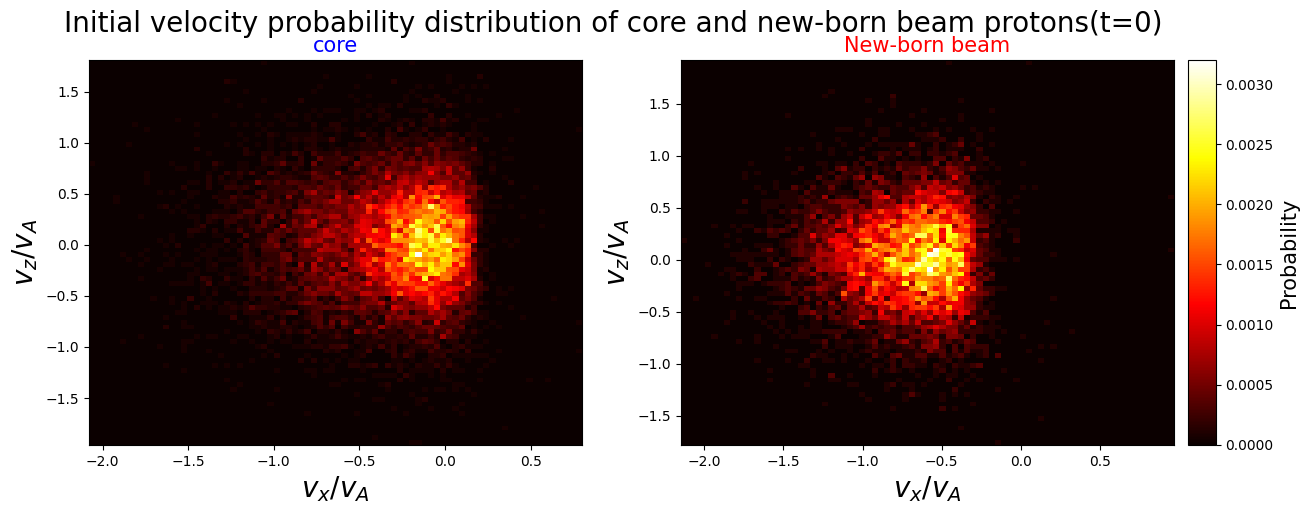

In [26]:
counts_mat_new_beam, vxedges_nb, vzedges_nb = np.histogram2d(p_c0.ux,
                                                    p_c0.uz, bins=[80, 80],
                                                    range=[[np.min(p_c0.ux), np.max(p_c0.ux)],
                                                            [np.min(p_c0.uz), np.max(p_c0.uz)]])
counts_mat_core, vxedges_c, vzedges_c = np.histogram2d(p_c0_core.ux,
                                                    p_c0_core.uz, bins=[80, 80],
                                                    range=[[np.min(p_c0_core.ux), np.max(p_c0_core.ux)],
                                                            [np.min(p_c0_core.uz), np.max(p_c0_core.uz)]])
# plt.contour(xedges_c[1:], zedges_c[1:], counts_mat_c.T, levels=20)
# ctf=plt.contourf(xedges_c[1:], zedges_c[1:], counts_mat_c.T, levels=20, cmap="jet")
fig, axes = plt.subplots(1,2, figsize=(14,5))
ax=axes[1]
ax.set_title("New-born beam", fontsize=15,c='r')
ax.set_xlabel(r"$v_x/v_A$", fontsize=20)
ax.set_ylabel(r"$v_z/v_A$", fontsize=20)
pclr=ax.pcolormesh(vxedges_nb[1:], vzedges_nb[1:], counts_mat_new_beam.T/counts_mat_new_beam.sum(), cmap="hot", vmin=0, vmax=0.0032)
# cbar=plt.colorbar(pclr)
# cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)
pos = ax.get_position()
cax = fig.add_axes([pos.x1 + 0.01, pos.y0, 0.02, pos.y1 - pos.y0])
cbar = plt.colorbar(pclr, cax=cax)
cbar.set_label("Probability", fontsize=15)
ax=axes[0]

pclr=ax.pcolormesh(vxedges_c[1:], vzedges_c[1:], counts_mat_core.T/counts_mat_core.sum(), cmap="hot", vmin=0, vmax=0.0032)
ax.set_xlabel(r"$v_x/v_A$", fontsize=20)
ax.set_ylabel(r"$v_z/v_A$", fontsize=20)
ax.set_title("core", fontsize=15,c='b')
# cbar=plt.colorbar(pclr)
# cbar.set_label(r"$\log_{10}{(Counts)}$", fontsize=15)


plt.suptitle("Initial velocity probability distribution of core and new-born beam protons(t=0)", fontsize=20)

C:\Users\mrwwn\AppData\Local\Temp\ipykernel_100164\882687473.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(vxedges_f[1:], vzedges_f[1:], np.log10(counts_mat_f.T), cmap="jet")


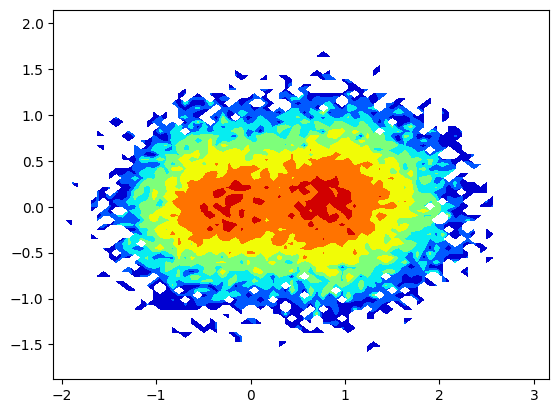

In [36]:
counts_mat_f, vxedges_f, vzedges_f = np.histogram2d(p_c.ux,
                                                    p_c.uz, bins=[80, 80],
                                                    range=[[np.min(p_c.ux), np.max(p_c.ux)],
                                                            [np.min(p_c.uz), np.max(p_c.uz)]])
plt.contourf(vxedges_f[1:], vzedges_f[1:], np.log10(counts_mat_f.T), cmap="jet")

In [50]:
print(256*256*512/1.2/800)

34952.53333333333
